###### top
# Welcome to the datalake course notebook! 

For this course, I’ve created a few hands on exercises to help you get a feel for the considerations to take into account during each of the different steps when building a datalake.


## Table of Contents

   [Section 1 & 2: Prep and Ingest](#Section-1-Prep-Ingest)

   [Section 3 & 4: Clean and Transform](#Section-3-Clean-Transform)

   [Section 5: Query and Visualize](#Section-5-Query-Visualize)

   [All Solutions](#All-Solutions)

   [Additional References and Resources](#Additional-References-and-Resources)

## Introduction
For these exercises, pretend that you are working with a University that has a Learning Management System.  In this University environment, students and instructors are accessing different pages for different courses several times a day.  Typically, student might be looking at online course content in modules, assignments or syllabus pages.  The activity generated by each user is being logged in a real time event stream.  

We are going to create a basic datalake using several source datasets.  We will ingest the datasets, clean and organize the data, then use the data to answer some questions.

Because our time together is short, it didn't make sense to create dependencies on cloud infrastructure and accounts. Instead, these notebook exercises will be using readily available python libraries.




# Section-1-Prep-Ingest

# Section 1 & 2 - Prepare Environment & Ingest Data

Here are the first set of tasks to get set up for this environment:

1. Find and launch Binderhub and create a new notebook.
2. In the notebook, begin by importing the following libraries:
    - Pandas
    - Numpy
    - Matplotlib.pyplot 
    - Hashlib
3. Save and return to the class after you have completed these steps.

[Back to Top](#top)

###### In this section, we first prepare the environment by importing the necessary python libraries which we will be using in this notebook.

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hashlib as hl

pd.__version__

'1.1.4'

### For this next section, we will start to ingest data from our example source systems.  We have several datasets to work with:

   **Courses**: Information about courses available for students and teachers.
   
   **Users**: Information about users accessing the learning management system. 
   
   **Activity**: An event log of activity taken by users in specific courses.

#### 1. Read each of the dataset csv files into separate dataframes using the pandas library

The datasets are located in a folder named 'data' within this notebook environment as follows:

    data/courses.csv
    data/users.csv
    data/activity.csv

In [97]:
# insert code here


#### 2. After reading in the data from the original csv files, you may want to save a version of the files in parquet format.

In [98]:
# insert code here


#### 3. Take a look through each source dataset once it has been ingested.


In [99]:
# insert code here


*Save and return to the class after you have completed these steps.*

[Link to solution](#Solution-Section-2)

# Section-3-Clean-Transform

# Section 3 - Clean and Transform Data

[Back to Top](#top)

###### In this section, we perform actions to clean and transform the data from our source systems.

For this next section, we will clean and organize the data which we have ingested into the datalake.

####  3a. Find and replace the null values in the users dataset.

In [100]:
# insert code here


####  3b. Another useful transformation at this stage is to anonymize personal information.  To do this, do the following: 
- Use sha256 as a one way hash function on the user identifers in the users and activity tables
- Replace the First and Last name fields with a masked value '*' 

In [101]:
# insert code here


#### 3c. Classify the object column in the activity dataset and create a new ‘category’ column.
#### Perform the following mappings for the data as it is transformed into this column:
      i) If object contains ‘module’, assign it to the ‘Module’ category 
     ii) If object contains ‘assignment’, assign it to the ‘Assignment’ category
    iii) If object contains ‘syllabus’, assign it to the ‘Syllabus’ category
     iv) If object contains ‘calendar’, assign it to the ‘Calendar’ category

In [102]:
# insert code here


#### 3d. Create a new dataframe by combining related dataframes (activity, user, course).  

#### Use the keys as follows:
   - Left join activity with **users** on activity.actor=user.userId   
   - Left join activity with **courses** on activity.course=courses.courseId

In [103]:
# insert code here


*Save and return to the class after you have completed these steps.*

[Link to Solution](#Solution-Section-3)

# Section-5-Query-Visualize

# Section 5 - Use Data to Answer Questions

[Back to Top](#top)

###### At this stage, the data is now organized in a way that makes it easier to use it to answer different questions.

Use the denormalized dataframe from the previous section to perform the following queries:

#### 5a. Top 5 pages (objects) accessed
         i) List resulting rows
        ii) Create a horizontal bar chart

In [104]:
# insert code here


#### 5b. What activity took place on October 30, 2020?
        i) - Create a table listing the rows with activity

In [105]:
# insert code here


#### 5c. Which hour of the day had peak usage by category?
        i) - Create a line graph showing activity grouped by hour and category

In [106]:
# insert code here


*Save and return to the class after you have completed these steps.*

[Link to Solution](#Solution-Section-5)

   # All-Solutions

[Back to Top](#top)

   # Solution-Section-2

##### Instructions
### For this next section, we will start to ingest data from our example source systems.  We have several datasets to work with:

    Courses: Information about courses available for students and teachers. 
    Users: Information about users accessing the learning management system. 
    Activity: An event log of activity taken by users in specific courses.

1. Read each of the dataset csv files into separate dataframes using the pandas library
2. Take a look through each source dataset once it has been ingested.
3. Save and return to the class after you have completed these steps.


###### The datasets are located in a folder named 'data' within this notebook environment as follows:
    data/courses.csv
    data/users.csv
    data/activity.csv

##### Solution

###### Use read_csv to read each csv file into local dataframes

In [107]:
courses_orig_df=pd.read_csv("../data/courses.csv")
users_orig_df=pd.read_csv("../data/users.csv")
activity_orig_df=pd.read_csv('../data/activity.csv',parse_dates=[0])

###### With large scale processing, it is recommended to use parquet files instead of csv. Reading and writing using parquet is faster because it is a binary file. Here is an example of saving the course file in parquet format.  Once saved in parquet, you can then use read_parquet to read the file back into a dataframe. 

In [108]:
courses_parquet_file = '../data/courses.parquet'
open( courses_parquet_file, 'w+' )
courses_orig_df.to_parquet(courses_parquet_file)

In [109]:
new_courses_orig_df = pd.read_parquet( courses_parquet_file )
new_courses_orig_df.head()

,courseId,courseTitle,description,academicSession,org,modality
0,1,Introduction to Algebra,"Fundamental concepts of algebra, including exp...",Fall2020,MATH,f2f
1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
2,3,Intro to Python Programming,A first course in computer programming using t...,Fall2020,COMPSCI,hybrid
3,4,History of Ancient Civilizations,"In this course, we will study the emergence of...",Fall2020,HIST,hybrid


###### Now let's take a look at the layout of the data in each dataset.
    In courses, we have a course identifier, a title, description and other attributes about the course.
    
    In users, we have the userId along with other information such as the names, roles, and so on.
    
    The activity dataset is formatted as an event stream. Each row represents a unique event with a specific timestamp, along with actor, action and object triples.

In [110]:
courses_orig_df.head()

,courseId,courseTitle,description,academicSession,org,modality
0,1,Introduction to Algebra,"Fundamental concepts of algebra, including exp...",Fall2020,MATH,f2f
1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
2,3,Intro to Python Programming,A first course in computer programming using t...,Fall2020,COMPSCI,hybrid
3,4,History of Ancient Civilizations,"In this course, we will study the emergence of...",Fall2020,HIST,hybrid


In [111]:
users_orig_df.head()

,userId,FirstName,LastName,Role,email,year
0,1001,Tom,Grove,Learner,tgrove@email.edu,1.0
1,1002,Lily,Chen,Learner,lchen@email.edu,NaN
2,1003,Jim,Folsom,Learner,jim.folsom@email.edu,2.0
3,1004,Dan,Rivera,Learner,rivera_dan@email.edu,1.0
4,1005,Brenda,Ulloa,Learner,brendau@email.edu,NaN


In [112]:
activity_orig_df.head()

,timestamp,actor,action,object,course
0,2020-10-30 06:30:00,1001,viewed,/syllabus,2
1,2020-10-30 06:31:00,1001,viewed,/module1,2
2,2020-10-30 06:43:00,1001,viewed,/assignment1,2
3,2020-10-30 06:50:00,1001,viewed,/calendar,2
4,2020-10-31 10:10:20,1001,viewed,/syllabus,2


[Back to Top](#top)

   # Solution-Section-3

# Section 3 - Clean and Transform Data

##### Instructions
###### In this section, we perform actions to clean and transform the data from our source systems.

For this next section, we will clean and organize the data which we have ingested into the datalake.

3a. Find and replace the null values in the users dataset.
3b. Classify the object column in the activity dataset and create a new ‘category’ column with the following mappings:
    - If object contains ‘module’, assign it to the ‘Module’ category
    - If object contains ‘assignment’, assign it to the ‘Assignment’ category
    - If object contains ‘syllabus’, assign it to the ‘Syllabus’ category
    - If object contains ‘calendar’, assign it to the ‘Calendar’ category
3c. Create a new dataframe by combining related dataframes (activity, user, course).  Use the keys as follows:
    - Left join activity with users on activity.actor=user.userId
    - Left join activity with courses on activity.course=courses.courseId

Save and return to the class after you have completed these steps.




##### Solution

In [113]:
courses_df = courses_orig_df.copy()
users_df = users_orig_df.copy()
activity_df = activity_orig_df.copy()

# 3a - find and replace null values

###### Often raw source data have varying ways nulls may be present. Nulls need to be cleaned up here because many downstream systems do not understand how to process nulls.

In [114]:
users_df.isnull()

,userId,FirstName,LastName,Role,email,year
0,False,False,False,False,False,False
1,False,False,False,False,False,True
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
5,False,False,False,False,False,True


###### Here, we replace nulls with a string constant of "No Year".

In [115]:
users_df["year"].fillna("No Year",inplace=True)

In [116]:
users_df.head()

,userId,FirstName,LastName,Role,email,year
0,1001,Tom,Grove,Learner,tgrove@email.edu,1
1,1002,Lily,Chen,Learner,lchen@email.edu,No Year
2,1003,Jim,Folsom,Learner,jim.folsom@email.edu,2
3,1004,Dan,Rivera,Learner,rivera_dan@email.edu,1
4,1005,Brenda,Ulloa,Learner,brendau@email.edu,No Year


In [117]:
activity_df.head()

,timestamp,actor,action,object,course
0,2020-10-30 06:30:00,1001,viewed,/syllabus,2
1,2020-10-30 06:31:00,1001,viewed,/module1,2
2,2020-10-30 06:43:00,1001,viewed,/assignment1,2
3,2020-10-30 06:50:00,1001,viewed,/calendar,2
4,2020-10-31 10:10:20,1001,viewed,/syllabus,2


# 3b - Anonymize Personal Information

####  Another useful transformation at this stage is to anonymize personal information.  To do this, do the following: 
- Use sha256 as a one way hash function on the user identifers in the users and activity tables
- Replace the First and Last name fields with a masked value '*' 

###### Run the sha function to anonymize the first and last name fields in the user dataframe

In [118]:
def hashID( userId ):
    m = hl.sha256()
    m.update( bytes( userId ) )
    return m.hexdigest()

def clearPII( pii ):
    return '*'

users_df["userId"]=users_df["userId"].apply( hashID )
users_df['FirstName'] = users_df["FirstName"].apply( clearPII )
users_df['LastName'] = users_df["LastName"].apply( clearPII )
activity_df['actor'] = activity_df['actor'].apply( hashID )

###### Notice that the userId and Actor fields in the users and activities dataframes are now the hashed values.  These values obscure the real id's, however the same id's will hash to the same values, retaining any relationships between dataframes.  

##### In addition, the personally identifiable information in the FirstName and LastName fields have been replaced with '*'.

In [119]:
users_df.head()

,userId,FirstName,LastName,Role,email,year
0,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
1,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,*,*,Learner,lchen@email.edu,No Year
2,bd66e8f62d34f70917102405af895c0b07b79c13fd2d1e...,*,*,Learner,jim.folsom@email.edu,2
3,fa16c3b03c75c0d2a74b01ab8bd3806b53f82abc36bbcc...,*,*,Learner,rivera_dan@email.edu,1
4,06d11f21b0e236e6d6b24601141a43d64113c4c507d592...,*,*,Learner,brendau@email.edu,No Year


In [120]:
activity_df.head()

,timestamp,actor,action,object,course
0,2020-10-30 06:30:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/syllabus,2
1,2020-10-30 06:31:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/module1,2
2,2020-10-30 06:43:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/assignment1,2
3,2020-10-30 06:50:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/calendar,2
4,2020-10-31 10:10:20,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/syllabus,2


# 3c - map object values to categories 

###### Next, let's take the raw object value and classify it into known categories.

###### Here we create a dictionary to map the object values to categories. This map allows us to group multiple objects, such as different modules or assignments, into designated categories. This is a common way to roll up data for reporting purposes.

In [121]:
object_to_category_dict={"syllabus":"Syllabus", "module":"Module", "assignment":"Assignment","calendar":"Calendar"}

def object_to_category( objectStr ):
    for objectKey in object_to_category_dict.keys():
        if objectKey in objectStr:
            return object_to_category_dict[objectKey]
    return "Other"
activity_df['category']=activity_df['object'].apply( object_to_category )


###### Notice the new category column should now contain the value of the mapped category.

In [122]:
activity_df.head()

,timestamp,actor,action,object,course,category
0,2020-10-30 06:30:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/syllabus,2,Syllabus
1,2020-10-30 06:31:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/module1,2,Module
2,2020-10-30 06:43:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/assignment1,2,Assignment
3,2020-10-30 06:50:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/calendar,2,Calendar
4,2020-10-31 10:10:20,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/syllabus,2,Syllabus


###### Here you can see multiple assignments grouped into the same "Assignment" category.

In [123]:
activity_df.tail()

,timestamp,actor,action,object,course,category
40,2020-10-13 11:00:00,1a93d442ca051b44f88e70432e7f71df0fcb88795a34bb...,updated,/syllabus,1,Syllabus
41,2020-10-14 11:00:00,1a93d442ca051b44f88e70432e7f71df0fcb88795a34bb...,updated,/assignment1,1,Assignment
42,2020-10-15 11:00:00,1a93d442ca051b44f88e70432e7f71df0fcb88795a34bb...,updated,/module1,1,Module
43,2020-10-16 11:00:00,1a93d442ca051b44f88e70432e7f71df0fcb88795a34bb...,updated,/module2,1,Module
44,2020-10-17 11:00:00,1a93d442ca051b44f88e70432e7f71df0fcb88795a34bb...,created,/assignment2,1,Assignment


# 3d - combine dataframes using keys

###### One of the most important ways to organize source data is by combining related datasets using known keys. 

    Here we join the activity dataframe with the related user information from the users dataset, as well as course information from the courses dataset. 

    For user information, we know that the actor column in the activity dataset refers to the userId from the user dataset. Therefore this is the key to use for the merged dataframe. 
    
    For course information, we know the course column in the activity dataset points to the courseId from the course dataset. 
    
    In both cases, we use a left join, because there may be users or courses listed in the source datasets that do not have corresponding activity records, therefore we do not want to include them in the merged dataframe.

In [124]:
new_df=activity_df.merge(users_df,left_on='actor', right_on='userId')

In [125]:
new_df

,timestamp,actor,action,object,course,category,userId,FirstName,LastName,Role,email,year
0,2020-10-30 06:30:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/syllabus,2,Syllabus,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
1,2020-10-30 06:31:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/module1,2,Module,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
2,2020-10-30 06:43:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/assignment1,2,Assignment,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
3,2020-10-30 06:50:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/calendar,2,Calendar,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
4,2020-10-31 10:10:20,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/syllabus,2,Syllabus,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
5,2020-11-01 10:12:20,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/assignment1,2,Assignment,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
6,2020-11-02 10:20:20,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/module1,2,Module,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
7,2020-11-03 10:30:20,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/module2,2,Module,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
8,2020-11-04 10:32:30,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/assignment2,2,Assignment,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
9,2020-10-30 08:30:00,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,viewed,/syllabus,2,Syllabus,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,*,*,Learner,lchen@email.edu,No Year


In [126]:
new_df.merge(courses_df,left_on='course', right_on='courseId')

,timestamp,actor,action,object,course,category,userId,FirstName,LastName,Role,email,year,courseId,courseTitle,description,academicSession,org,modality
0,2020-10-30 06:30:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/syllabus,2,Syllabus,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
1,2020-10-30 06:31:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/module1,2,Module,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
2,2020-10-30 06:43:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/assignment1,2,Assignment,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
3,2020-10-30 06:50:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/calendar,2,Calendar,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
4,2020-10-31 10:10:20,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/syllabus,2,Syllabus,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
5,2020-11-01 10:12:20,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/assignment1,2,Assignment,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
6,2020-11-02 10:20:20,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/module1,2,Module,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
7,2020-11-03 10:30:20,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/module2,2,Module,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
8,2020-11-04 10:32:30,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/assignment2,2,Assignment,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online
9,2020-10-30 08:30:00,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,viewed,/syllabus,2,Syllabus,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,*,*,Learner,lchen@email.edu,No Year,2,Biology 101,Study of biology as it relates to humans and t...,Fall2020,BIOL,online


[Back to Top](#top)

   # Solution-Section-5

# Section 5 - Use Data to Answer Questions

##### Instructions
###### At this stage, the data is now organized in a way that makes it easier to use it to answer different questions.

Use the denormalized dataframe from the previous section to perform the following queries:
    5a. Top 5 pages (objects) accessed
        - List resulting rows
        - Create a horizontal bar chart
    5b. What activity took place on October 30, 2020?
        - Create a table listing the rows with activity
    5c. Which hour of the day had peak usage by category?
        - Create a line graph showing activity grouped by hour and category

Save and return to the class after you have completed these steps.


##### Solution

###### Since our activity data shows pages being accessed by different users in different courses, let's find out which pages were the most frequently accessed.

# 5a - Top 5 pages being accessed

###### We can use value_counts to check the frequency of each value, in this case, we want to check the pages accessed via the 'object' column.  In addition, we can build a simple bar graph to visualize this data.

In [127]:
new_df['object'].value_counts()[:5]

/syllabus       10
/assignment1    10
/module1        10
/module2         5
/calendar        5
Name: object, dtype: int64

<AxesSubplot:>

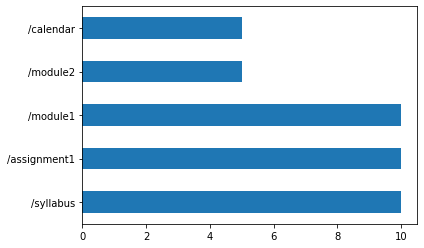

In [128]:
new_df['object'].value_counts()[:5].plot(kind='barh')

In [129]:
new_df.shape

(45, 12)

In [130]:
new_df.dtypes

timestamp    datetime64[ns]
actor                object
action               object
object               object
course                int64
category             object
userId               object
FirstName            object
LastName             object
Role                 object
email                object
year                 object
dtype: object

###### Another common ad hoc query is to look at specific events that occurred on a specific day.

# 5b - What activity took place on Oct 30, 2020

In [131]:
new_df=new_df.set_index('timestamp') 

In [132]:
new_df.loc['2020-10-30']

,actor,action,object,course,category,userId,FirstName,LastName,Role,email,year
timestamp,,,,,,,,,,,
2020-10-30 06:30:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/syllabus,2,Syllabus,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
2020-10-30 06:31:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/module1,2,Module,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
2020-10-30 06:43:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/assignment1,2,Assignment,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
2020-10-30 06:50:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/calendar,2,Calendar,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
2020-10-30 08:30:00,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,viewed,/syllabus,2,Syllabus,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,*,*,Learner,lchen@email.edu,No Year
2020-10-30 08:31:00,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,viewed,/module1,2,Module,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,*,*,Learner,lchen@email.edu,No Year
2020-10-30 08:43:00,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,viewed,/assignment1,2,Assignment,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,*,*,Learner,lchen@email.edu,No Year
2020-10-30 08:50:00,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,viewed,/calendar,2,Calendar,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,*,*,Learner,lchen@email.edu,No Year
2020-10-30 06:30:00,bd66e8f62d34f70917102405af895c0b07b79c13fd2d1e...,viewed,/syllabus,3,Syllabus,bd66e8f62d34f70917102405af895c0b07b79c13fd2d1e...,*,*,Learner,jim.folsom@email.edu,2


###### Since the activity records were categorized in section 3 above, we can now perform queries and visualizations based on the resulting classified rows.

# 5c - Which hour of the day had peak usage by category? 

In [133]:
new_df[new_df['category'] == 'Syllabus']

,actor,action,object,course,category,userId,FirstName,LastName,Role,email,year
timestamp,,,,,,,,,,,
2020-10-30 06:30:00,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/syllabus,2,Syllabus,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
2020-10-31 10:10:20,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,viewed,/syllabus,2,Syllabus,2f33b022758805a3bfcb77f61472e4a4a12fadeaf34469...,*,*,Learner,tgrove@email.edu,1
2020-10-30 08:30:00,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,viewed,/syllabus,2,Syllabus,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,*,*,Learner,lchen@email.edu,No Year
2020-10-31 10:11:20,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,viewed,/syllabus,2,Syllabus,5f0abf2094d34e1c2e12d036a25f45fa1db39620818891...,*,*,Learner,lchen@email.edu,No Year
2020-10-30 06:30:00,bd66e8f62d34f70917102405af895c0b07b79c13fd2d1e...,viewed,/syllabus,3,Syllabus,bd66e8f62d34f70917102405af895c0b07b79c13fd2d1e...,*,*,Learner,jim.folsom@email.edu,2
2020-10-31 10:10:20,bd66e8f62d34f70917102405af895c0b07b79c13fd2d1e...,viewed,/syllabus,3,Syllabus,bd66e8f62d34f70917102405af895c0b07b79c13fd2d1e...,*,*,Learner,jim.folsom@email.edu,2
2020-10-30 06:30:00,fa16c3b03c75c0d2a74b01ab8bd3806b53f82abc36bbcc...,viewed,/syllabus,3,Syllabus,fa16c3b03c75c0d2a74b01ab8bd3806b53f82abc36bbcc...,*,*,Learner,rivera_dan@email.edu,1
2020-10-31 10:10:20,fa16c3b03c75c0d2a74b01ab8bd3806b53f82abc36bbcc...,viewed,/syllabus,3,Syllabus,fa16c3b03c75c0d2a74b01ab8bd3806b53f82abc36bbcc...,*,*,Learner,rivera_dan@email.edu,1
2020-10-09 11:00:00,1a93d442ca051b44f88e70432e7f71df0fcb88795a34bb...,created,/syllabus,1,Syllabus,1a93d442ca051b44f88e70432e7f71df0fcb88795a34bb...,*,*,Instructor,tteach@email.edu,No Year


###### First we create an index of the rows in the dataframe using the hour component of the timestamp column.

In [134]:
new_df.index.hour

Int64Index([ 6,  6,  6,  6, 10, 10, 10, 10, 10,  8,  8,  8,  8, 10, 10, 10, 10,
            11,  6,  6,  6,  6, 10, 10, 10, 10, 10,  6,  6,  6,  6, 10, 10, 10,
            10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11],
           dtype='int64', name='timestamp')

In [135]:
new_df['hour'] = new_df.index.hour

###### Next, we count the occurrences of each category within the hour.

In [136]:
counts = new_df[['hour','category']].groupby(['hour', 'category']).agg(len)

In [137]:
counts

hour  category  
6     Assignment    3
      Calendar      3
      Module        3
      Syllabus      3
8     Assignment    1
      Calendar      1
      Module        1
      Syllabus      1
10    Assignment    7
      Module        8
      Syllabus      4
11    Assignment    4
      Calendar      1
      Module        3
      Syllabus      2
dtype: int64

In [138]:
new_counts = counts.reset_index(['hour', 'category'])
new_counts.columns.values[-1] = 'Count'
new_counts

,hour,category,Count
0,6,Assignment,3
1,6,Calendar,3
2,6,Module,3
3,6,Syllabus,3
4,8,Assignment,1
5,8,Calendar,1
6,8,Module,1
7,8,Syllabus,1
8,10,Assignment,7
9,10,Module,8


###### Creating a pivot table allows us to set up the records to visualize via a graph.

In [139]:
new_counts_pivoted = pd.pivot_table(new_counts, values=['Count'], index=['hour'], columns=['category'], aggfunc=np.sum)

In [140]:
new_counts_pivoted

Count                         
category Assignment Calendar Module Syllabus
hour                                        
6               3.0      3.0    3.0      3.0
8               1.0      1.0    1.0      1.0
10              7.0      NaN    8.0      4.0
11              4.0      1.0    3.0      2.0

###### This graph shows the number of occurrences of each type of access by hour of the day.   From this graph, we can see that the 10 o clock hour is the most active across the board for all types of access.

<AxesSubplot:xlabel='hour'>

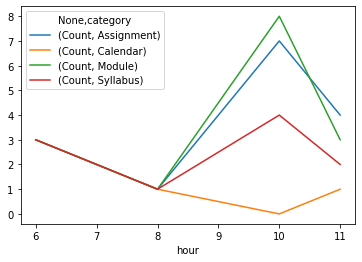

In [141]:
new_counts_pivoted.fillna(0.0).plot(kind='line')

# Additional-References-and-Resources

- https://www.unicon.net/insights/articles/building-a-data-lake

- https://www.unicon.net/insights/blogs/what-is-a-data-lake-anyway

- https://aws.amazon.com/big-data/datalakes-and-analytics/what-is-a-data-lake/

- https://aws.amazon.com/solutions/implementations/data-lake-solution/

- https://dev.socrata.com/blog/2016/02/01/pandas-and-jupyter-notebook.html

[Back to Top](#top)